In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Decisions and Uncertainty

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [3]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [4]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [5]:
# Null: The Section 3 average is like the average of 27 random scores from the class.

# Alternative: No, it's too low.

In [6]:
# observed statistic

observerd_average = 13.6667

In [7]:
np.average(scores.sample(27, with_replacement=False).column('Midterm'))

16.555555555555557

In [8]:
averages = make_array()

repetitions = 50000
for i in np.arange(repetitions):
    new_average = np.average(scores.sample(27, with_replacement=False).column('Midterm'))
    averages = np.append(averages, new_average)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


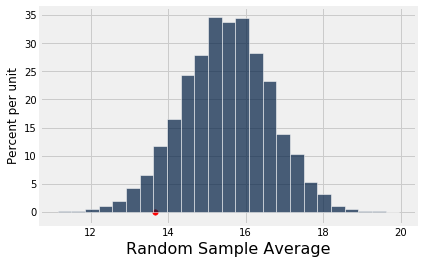

In [9]:
Table().with_column('Random Sample Average', averages).hist(bins = 25, ec='w')
plots.scatter(observerd_average, 0, color='red', s=30);

In [10]:
np.count_nonzero(averages <= observerd_average) / repetitions

0.05812

In [11]:
np.count_nonzero(averages <= 13.6) / repetitions

0.05084

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


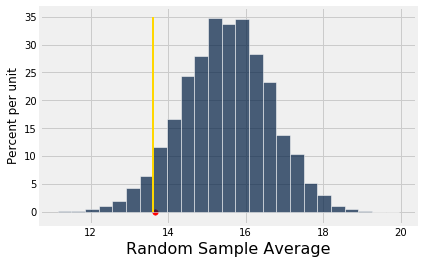

In [12]:
Table().with_column('Random Sample Average', averages).hist(bins = 25, ec='w')
plots.scatter(observerd_average, 0, color='red', s=30)
plots.plot([13.6, 13.6], [0, 0.35], color='gold', lw=2);